In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
#importing required imports from sk learn
from sklearn.linear_model import LinearRegression#from training our model
from sklearn.metrics import mean_absolute_error#for evaluating the model
from sklearn.utils.validation import check_is_fitted


In [ ]:
def wrangle(filename):
  #reading the csv file
  df = pd.read_csv(filename)
  high,low = df["surface_covered_in_m2"].quantile([0.1,0.9])

  mask_state = df["place_with_parent_names"].str.contains("Capital Federal")
  mask_price = df["price_aprox_usd"] < 400000.0
  mask_apt = df["property_type"] == "apartment"
  mask_range_area = df["surface_covered_in_m2"].between(high,low)

  #applying the masks
  df = df[mask_state & mask_price & mask_apt & mask_range_area]

  return df

In [ ]:
df = wrangle("/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-1.csv")
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


In [ ]:
len(df)

777

In [ ]:
"""#mask_state = df["place_with_parent_names"].str.split("|",expand =True)[2] == "Capital Federal"
#using str.contains in place of method chaining
mask_state = df["place_with_parent_names"].str.contains("Capital Federal")
#df[mask_state].head()

#creating a maks for price < $400,000 USD
mask_price = df["price_aprox_usd"] < 400000.0
#df[mask_price].head()

#creating mask for property type = apartments
df["property_type"].value_counts()
mask_apt = df["property_type"] == "apartment"
df[mask_apt].head()"""

'#mask_state = df["place_with_parent_names"].str.split("|",expand =True)[2] == "Capital Federal"\n#using str.contains in place of method chaining\nmask_state = df["place_with_parent_names"].str.contains("Capital Federal")\n#df[mask_state].head()\n\n#creating a maks for price < $400,000 USD\nmask_price = df["price_aprox_usd"] < 400000.0\n#df[mask_price].head()\n\n#creating mask for property type = apartments\ndf["property_type"].value_counts()\nmask_apt = df["property_type"] == "apartment"\ndf[mask_apt].head()'

TypeError: 'str' object is not callable

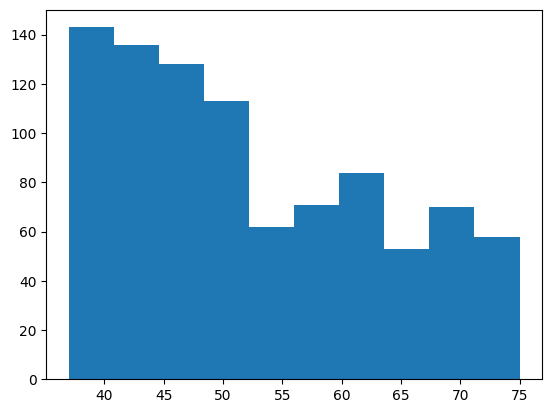

In [ ]:
#creating a histogram
plt.hist(
    df["surface_covered_in_m2"]
)
plt.xlabel("Area in Sq Meters")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");
# from the skewness we can easily find out that there are outliers

In [ ]:
plt.boxplot(
    df["surface_covered_in_m2"], vert=False
)

In [ ]:
#Summary Statistics:
df["surface_covered_in_m2"].describe()

#the min surface_area = 0(not possible) and the max surface_area = 1635(way outside our range)

,surface_covered_in_m2
count,918.000000
mean,52.379085
std,11.037760
min,37.000000
25%,43.000000
50%,50.000000
75%,60.000000
max,75.000000


In [ ]:
#we can take qunatiles to get the range of numbers we want
high,low = df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_range_area = df["surface_covered_in_m2"].between(high,low)
print("lower range:",low)
print("higher range:",high)

df[mask_range_area]["surface_covered_in_m2"].describe()

lower range: 70.0
higher range: 39.0


,surface_covered_in_m2
count,777.000000
mean,52.075933
std,9.213848
min,39.000000
25%,44.000000
50%,50.000000
75%,60.000000
max,70.000000


TypeError: 'str' object is not callable

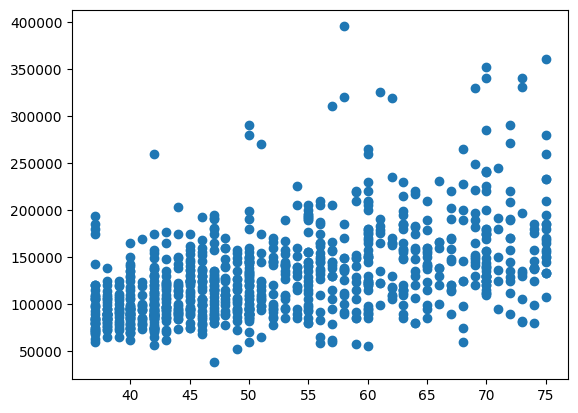

In [ ]:
#finding out the relationship between price and area
plt.scatter(
    x = df["surface_covered_in_m2"],
    y = df["price_aprox_usd"]
)
plt.xlabel("Surface area in sq meters")
plt.ylabel("Price in US Dollars")
plt.title ("Price Vs Home Sizes")

In [ ]:
#Spliting the data into feature matrices and target vectors
features = ["surface_covered_in_m2"]
X_train = df[features]
print("shape of X_train", X_train.shape)

target = "price_aprox_usd"
y_train = df[target]
print("shape of y_train", _train.shape)

shape of X_train (918, 1)


NameError: name '_train' is not defined

In [ ]:
#Building the linear model
"""Three parts in building a model:
- Baseline
- Iterate
- Evaluate

1st thing for baseline is to understand whethere it is a regression or a classification problem
 create a naive model
"""

'Three parts in building a model:\n- Baseline\n- Iterate\n- Evaluate\n\n1st thing for baseline is to understand whethere it is a regression or a classification problem\n create a naive model\n'

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:5]

[np.float64(128710.35965141612),
 np.float64(128710.35965141612),
 np.float64(128710.35965141612),
 np.float64(128710.35965141612),
 np.float64(128710.35965141612)]

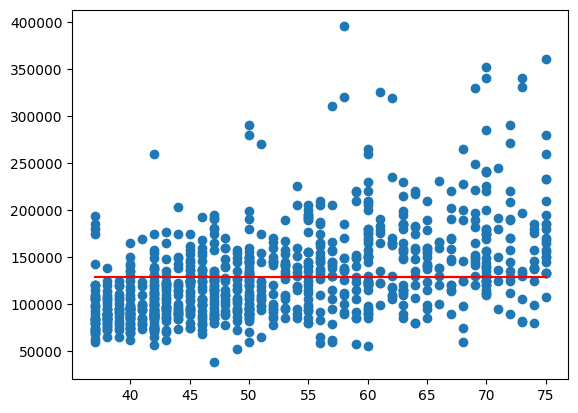

In [ ]:
#checking the fit of the mean of
plt.plot(
    X_train,
    y_pred_baseline,
    color = "red",
    label = "baseline model"
)
plt.scatter(
    x = X_train,
    y = y_train
)
plt.xlabel = "Surface area in sq meters"
plt.ylabel = "Price in US Dollars"
plt.title = "Price Vs Home Sizes";

In [ ]:
#performance metrics
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
print("Mean Apt price", round(y_mean,2))
print("Baseline MAE", round(mae_baseline,2))


Mean Apt price 128710.36
Baseline MAE 35638.97


In [ ]:
#ITERATE

In [ ]:
#instantiate a model
model = LinearRegression()

#training the model
model.fit(X_train,y_train)
check_is_fitted(model)

In [ ]:
#making predictions
y_pred_train = model.predict(X_train)
print(y_pred_train[:5])
y_pred_train.shape

[167252.52968279 106008.22092374 132255.78182047 106008.22092374
 123506.5948549 ]


(918,)

In [ ]:
#EVALUATE

mae_training = mean_absolute_error(y_train, y_pred_train)
mae_training

29820.705253766617

In [ ]:
#intercept
intercept = round(model.intercept_,2)
print("intercept of model", round(intercept,2))

#coefficient
coeff = round(model.coef_[0],2)
print("Coefficient of model",round(coeff,2))

print(f"apt_price = {intercept} + {coeff} * surface in sq meter")

intercept of model 14141.76
Coefficient of model 2187.3
apt_price = 14141.76 + 2187.3 * surface in sq meter


# **Apt_price = 11433.31 + 2253.12 * surface in sq meter**

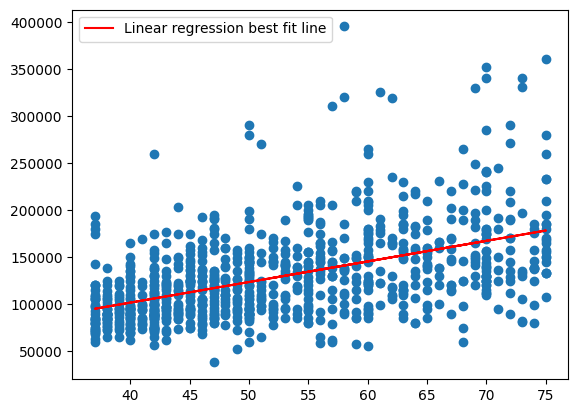

In [ ]:
plt.plot(
    X_train,model.predict(X_train),
    color = "red",
    label = "Linear regression best fit line"
)
plt.scatter(X_train, y_train)
plt.legend();